# LSTM

## Data Preprocessing

In [0]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

In [0]:
# path = Path('datasets/equities/mbb.csv')
path = Path('mbb.csv')

In [0]:
df = pd.read_csv(path)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 7 columns):
Date        1893 non-null object
Price       1893 non-null float64
Open        1893 non-null float64
High        1893 non-null float64
Low         1893 non-null float64
Vol.        1893 non-null object
Change %    1893 non-null object
dtypes: float64(4), object(3)
memory usage: 103.6+ KB


In [80]:
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 24, 2019",8.99,9.00,9.05,8.96,4.78M,-0.33%
1,"May 23, 2019",9.02,8.75,9.10,8.75,9.07M,0.33%
2,"May 21, 2019",8.99,9.00,9.04,8.95,5.88M,-0.11%
3,"May 17, 2019",9.00,9.00,9.02,8.98,5.44M,0.45%
4,"May 16, 2019",8.96,9.01,9.02,8.96,6.56M,-0.55%
5,"May 15, 2019",9.01,8.98,9.04,8.95,14.21M,0.56%
6,"May 14, 2019",8.96,8.90,8.99,8.90,9.81M,-0.22%
7,"May 13, 2019",8.98,8.98,9.00,8.91,9.16M,0.11%
8,"May 10, 2019",8.97,8.97,8.99,8.91,9.95M,0.00%
9,"May 09, 2019",8.97,8.98,9.00,8.96,11.64M,0.00%


In [0]:
# Convert the date column
df['Date'] = pd.to_datetime(df['Date'])

In [82]:
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-05-24,8.99,9.00,9.05,8.96,4.78M,-0.33%
1,2019-05-23,9.02,8.75,9.10,8.75,9.07M,0.33%
2,2019-05-21,8.99,9.00,9.04,8.95,5.88M,-0.11%
3,2019-05-17,9.00,9.00,9.02,8.98,5.44M,0.45%
4,2019-05-16,8.96,9.01,9.02,8.96,6.56M,-0.55%
5,2019-05-15,9.01,8.98,9.04,8.95,14.21M,0.56%
6,2019-05-14,8.96,8.90,8.99,8.90,9.81M,-0.22%
7,2019-05-13,8.98,8.98,9.00,8.91,9.16M,0.11%
8,2019-05-10,8.97,8.97,8.99,8.91,9.95M,0.00%
9,2019-05-09,8.97,8.98,9.00,8.96,11.64M,0.00%


In [0]:
# Sort date column ascending
df.sort_values(by=['Date'], inplace=True)

In [84]:
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
1892,2011-09-02,8.72,9.00,9.00,8.69,12.92M,0.00%
1891,2011-09-05,8.73,8.72,8.75,8.70,12.39M,0.11%
1890,2011-09-06,8.68,8.72,8.72,8.68,11.48M,-0.57%
1889,2011-09-07,8.67,8.70,8.70,8.64,5.73M,-0.12%
1888,2011-09-08,8.69,8.71,8.74,8.67,4.69M,0.23%
1887,2011-09-09,8.69,8.70,8.70,8.68,5.09M,0.00%
1886,2011-09-12,8.61,8.65,8.68,8.55,8.59M,-0.92%
1885,2011-09-13,8.60,8.58,8.61,8.55,3.62M,-0.12%
1884,2011-09-14,8.60,8.64,8.64,8.57,10.24M,0.00%
1883,2011-09-15,8.59,8.62,8.62,8.57,7.59M,-0.12%


In [0]:
# train_test_split?
# Split to training and test set without shuffling
training_set, test_set = train_test_split(df, test_size=0.10, shuffle=False)

In [86]:
print(len(training_set));training_set.head(10)

1703


,Date,Price,Open,High,Low,Vol.,Change %
1892,2011-09-02,8.72,9.00,9.00,8.69,12.92M,0.00%
1891,2011-09-05,8.73,8.72,8.75,8.70,12.39M,0.11%
1890,2011-09-06,8.68,8.72,8.72,8.68,11.48M,-0.57%
1889,2011-09-07,8.67,8.70,8.70,8.64,5.73M,-0.12%
1888,2011-09-08,8.69,8.71,8.74,8.67,4.69M,0.23%
1887,2011-09-09,8.69,8.70,8.70,8.68,5.09M,0.00%
1886,2011-09-12,8.61,8.65,8.68,8.55,8.59M,-0.92%
1885,2011-09-13,8.60,8.58,8.61,8.55,3.62M,-0.12%
1884,2011-09-14,8.60,8.64,8.64,8.57,10.24M,0.00%
1883,2011-09-15,8.59,8.62,8.62,8.57,7.59M,-0.12%


In [87]:
print(len(test_set));test_set.head(10)

190


,Date,Price,Open,High,Low,Vol.,Change %
189,2018-08-10,9.89,9.90,9.93,9.88,10.03M,-0.10%
188,2018-08-13,9.88,9.89,9.90,9.85,6.73M,-0.10%
187,2018-08-14,9.80,9.86,9.90,9.80,10.30M,-0.81%
186,2018-08-15,9.79,9.80,9.82,9.76,7.34M,-0.10%
185,2018-08-16,9.79,9.78,9.82,9.77,6.14M,0.00%
184,2018-08-17,9.78,9.80,9.81,9.78,5.92M,-0.10%
183,2018-08-20,9.79,9.77,9.85,9.77,6.42M,0.10%
182,2018-08-21,9.82,9.80,9.84,9.78,13.85M,0.31%
181,2018-08-23,9.81,9.81,9.82,9.77,10.97M,-0.10%
180,2018-08-24,9.81,9.80,9.84,9.80,6.11M,0.00%


In [88]:
# Use the Open price
training_set = training_set.iloc[:,2:3].values
print(training_set)

[[9.  ]
 [8.72]
 [8.72]
 ...
 [9.86]
 [9.89]
 [9.9 ]]


In [89]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
print(training_set)

[[0.43880597]
 [0.35522388]
 [0.35522388]
 ...
 [0.69552239]
 [0.70447761]
 [0.70746269]]


In [90]:
n = len(training_set); n

1703

In [54]:
# Getting the inputs and the ouputs
# Restricting the input and output based on how LSTM functions.
X_train = training_set[0:n-1]
y_train = training_set[1:n]
print(X_train); print(len(X_train))
print(y_train); print(len(y_train))

[[0.43880597]
 [0.35522388]
 [0.35522388]
 ...
 [0.68656716]
 [0.69552239]
 [0.70447761]]
1702
[[0.35522388]
 [0.35522388]
 [0.34925373]
 ...
 [0.69552239]
 [0.70447761]
 [0.70746269]]
1702


In [0]:
# Reshaping - Adding time interval as a dimension for input.
X_train = np.reshape(X_train, (n-1, 1, 1))

In [56]:
print(X_train.shape)

(1702, 1, 1)


## Build the Network

In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [0]:
regressor = Sequential()

# 4 memory units, sigmoid activation function and (None time interval with 1 attribute as input)
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

In [0]:
# 1 neuron in the output layer for 1 dimensional output
regressor.add(Dense(units = 1))

In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [71]:
regressor.fit(X_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
1702/1702 [==============================] - 0s 138us/step - loss: 6.1533e-04
Epoch 2/10
1702/1702 [==============================] - 0s 129us/step - loss: 6.1762e-04
Epoch 3/10
1702/1702 [==============================] - 0s 129us/step - loss: 6.0982e-04
Epoch 4/10
1702/1702 [==============================] - 0s 128us/step - loss: 6.0552e-04
Epoch 5/10
1702/1702 [==============================] - 0s 129us/step - loss: 6.0687e-04
Epoch 6/10
1702/1702 [==============================] - 0s 136us/step - loss: 6.0838e-04
Epoch 7/10
1702/1702 [==============================] - 0s 131us/step - loss: 6.0781e-04
Epoch 8/10
1702/1702 [==============================] - 0s 128us/step - loss: 6.0991e-04
Epoch 9/10
1702/1702 [==============================] - 0s 130us/step - loss: 6.1052e-04
Epoch 10/10
1702/1702 [==============================] - 0s 127us/step - loss: 6.0722e-04


## Prediction

In [91]:
real_stock_price = test_set.iloc[:,2:3].values; len(real_stock_price)

190

In [92]:
# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(real_stock_price), 1, 1))
inputs.shape


(190, 1, 1)

In [0]:
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Visualize the results

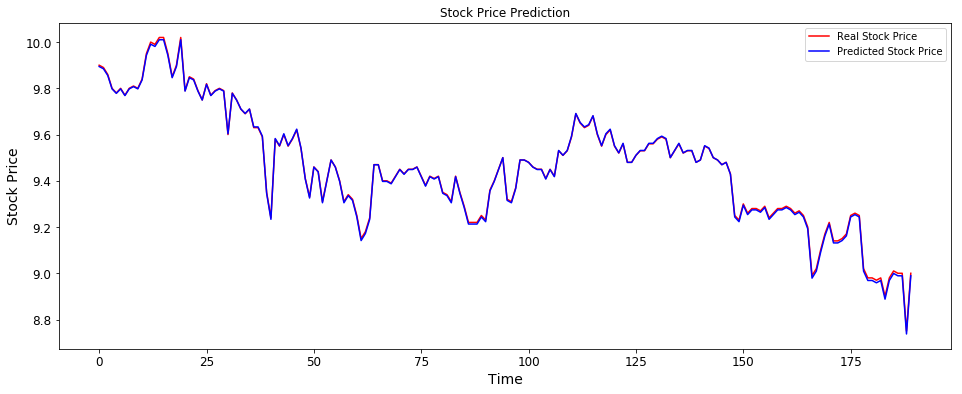

In [104]:
plt.figure(figsize=(16, 6))
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [0]:
# Make predictions on entire dataset
training_set, test_set = train_test_split(df, test_size=0.10, shuffle=False)
real_stock_price_train = training_set.iloc[:,2:3].values

In [0]:
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

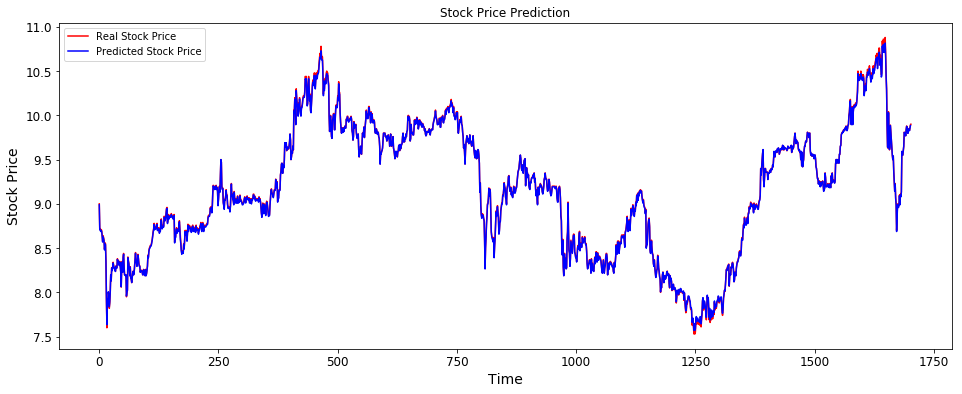

In [108]:
# Visualising the results
plt.figure(figsize=(16, 6))
plt.plot(real_stock_price_train, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Evaluation

In [70]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

0.008756224759704497
